# Принятие решений в бизнесе

## Часть 1

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.1f}'.format
pd.options.display.max_colwidth = 200

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют. ICE и RICE - способы приоритизировать гипотезы.

ICE рассчитывает по формуле (impact(влияние) * confidence(уверенность)) / efforts(усилия). Каждому параметру присваивается своя оценка. В данном случае параметры оцениваются числом от 0 до 10.

RICE = (reach * impact * confidence)/efforts, где reach - оценка, скольких пользователей затронет изменение. Как и в предыдущем случае, каждому параметру присваивают оценку.

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [6]:
hypothesis.sort_values(by=['ICE'], ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Топ-3 гипотезы после использования метода приоритизации ICE:

1. Запустить акцию, дающую скидку на товар в день рождения.

2. Добавить два новых канала привлечения трафика, 
что позволит привлекать на 30% больше пользователей.

3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [7]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [8]:
hypothesis.sort_values(by=['RICE'], ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Топ-3 гипотезы после использования метода приоритизации RICE:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

После применения RICE порядок приоритетов гипотез изменился, что связано с разными методами вычисления приоритизации гипотез. При рассчете ICE учитываются параметры: Impact, Confidence, Efforts, но не учитывается Reach (скольких пользователей затронет изменение, которое хотим внести), как в случае с RICE. 

## Часть 2

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

В начале подготовим данные. Проверим данные на наличие пропусков и дубликатов. Также стоит обратить внимание, что некоторые пользователи могли попасть в обе группы: их также нужны проверить и решить, что с ними делать.

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
visitors.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

Изменим тип данных в дате.

In [17]:
orders['date'] = pd.to_datetime(orders['date'])

In [18]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Пропуски и полные дубликаты отсутствуют.

Посчитаем, есть ли пользователи, попавшие в обе группы. Если есть - удалим.

In [19]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [20]:
dupl = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').reset_index()

In [21]:
orders = orders[~orders['visitorId'].isin(dupl['visitorId'])]

In [22]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    0
dtype: int64

Можно ещё проверить, если ли отрицательное число в выручке, чтобы не искажало результаты.

In [23]:
orders.query('revenue<0').count()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Посчитаем количество покупателей в каждой группе.

In [24]:
display(orders.query('group=="A"').count())
display(orders.query('group=="B"').count())

transactionId    468
visitorId        468
date             468
revenue          468
group            468
dtype: int64

transactionId    548
visitorId        548
date             548
revenue          548
group            548
dtype: int64

Таким образом, предобработка данных выявила, что в данных есть пользователи, которые попали в обе группы. Так как такие пересечения влияют на результаты теста, их удалили.
Кроме того, стоит обратить внимание, что в группе В больше пользователей, чем в группе А.

Далее можно переходить к построению графиков.

Создаем массив уникальных пар значений дат и групп теста.

In [25]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(5)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 

In [26]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] 
        <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Соберем агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [27]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] 
<= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяем кумулятивные данные в одной таблице.

In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Посмотрим даты начала и конца в таблице.

In [29]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [30]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

Теперь, подготовив данные, можно построить графи кумулятивной выручки по группам.

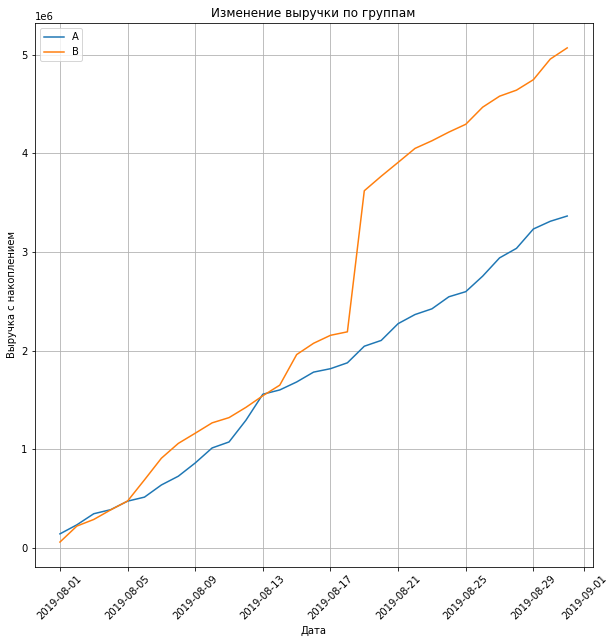

In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка с накоплением')
plt.xticks(rotation=45)
plt.title('Изменение выручки по группам') 
plt.grid()
plt.legend()
plt.show()

Выручка увеличивается неравномерно. По графику видно, что лучше себя показала группа B, с самого начала эксперимента группа А отстает. Возможно, покупатели из группы В делали дорогие покупки или по какой-то причине с середины месяца стали покупать больше, т.е увеличилось число заказов.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

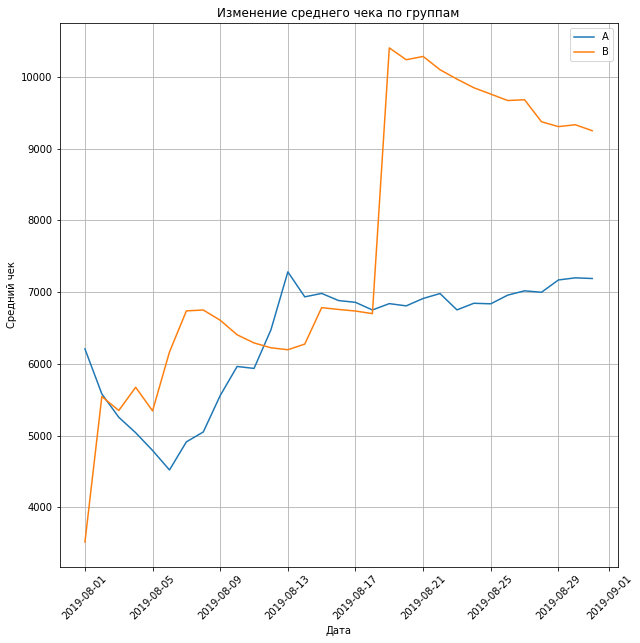

In [32]:
plt.figure(figsize=(10, 10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.title('Изменение среднего чека по группам') 
plt.grid()
plt.legend()
plt.show()

Средний чек изменяется неравномерно. Группа В с середины месяца значительно оторвалась вперед по сравнению с группой А опять с середины месяца, на графике виден резкий всплеск. Возможно, в группу B попали крупные заказы.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

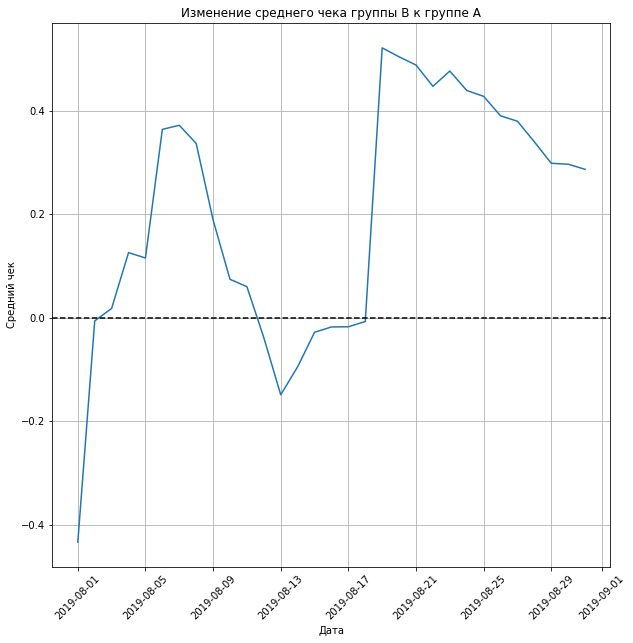

In [33]:
plt.figure(figsize=(10, 10))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Изменение среднего чека группы В к группе А') 
plt.grid()
plt.show()

График различия между группами скачет, наблюдаются резкие всплески, т.е. график "колеблется". Впоследствии нужно будет обратить внимание на аномалии и дорогие заказы.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [34]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [35]:
cumulativeData['conversion'].min()

0.023842917251051893

In [36]:
cumulativeData['conversion'].max()

0.03577235772357724

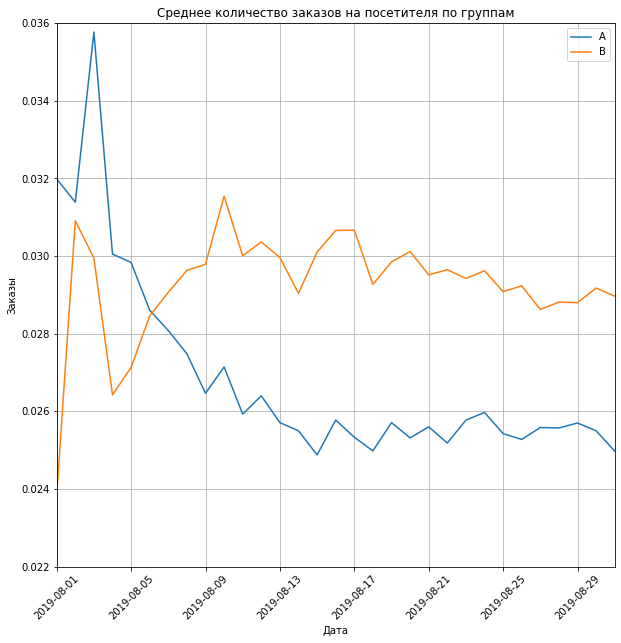

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.022, 0.036])

plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.title('Среднее количество заказов на посетителя по группам') 
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

Среднее количество заказов у группы В после "провала" в начале начало резко расти, в то время как у группы А после скачка в начале наблюдается резкий спад. В целом, уже в середине первой неделе теста группа В по кол-ву закзов вырвалась очень сильно вперед по сравнению с группой А.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

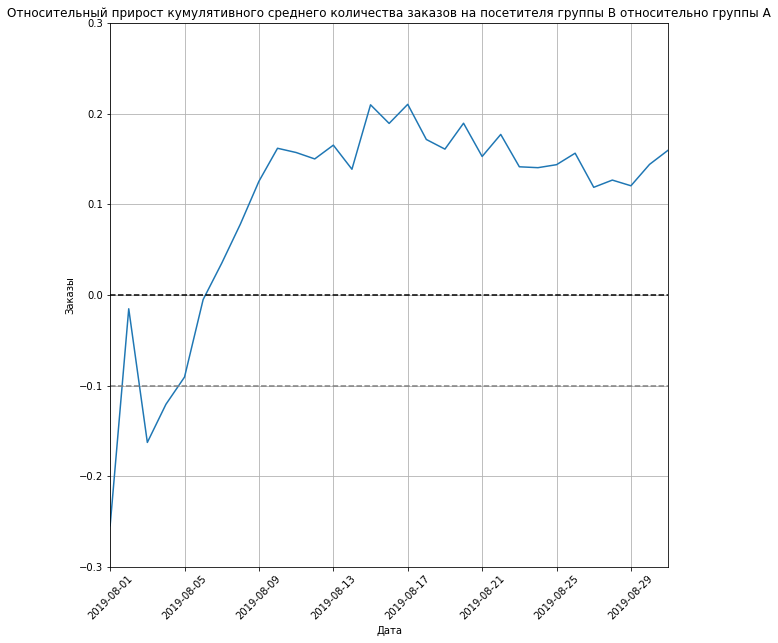

In [38]:
plt.figure(figsize=(10, 10))
mergedCumulativeConversions = cumulativeDataA[['date',
'conversion']].merge(cumulativeDataB[['date','conversion']], 
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.3, 0.3])
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A') 
plt.grid()
plt.show()

В начале группа В проигрывала группе А, но затем вырвалась вперед, и показатель стал быстро расти.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [39]:
visitors_transactions = orders.groupby('visitorId',
as_index=False).agg({'transactionId': 'nunique'}).sort_values(by='transactionId', ascending=False)
visitors_transactions

,visitorId,transactionId
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


In [40]:
visitors_transactions['transactionId'].describe()

count   973.0
mean      1.0
std       0.2
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       3.0
Name: transactionId, dtype: float64

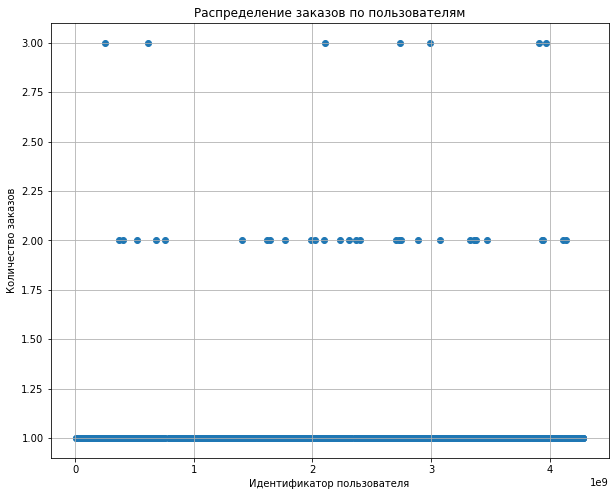

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(visitors_transactions['visitorId'], visitors_transactions['transactionId'])
plt.xlabel('Идентификатор пользователя')
plt.ylabel('Количество заказов')
plt.title('Распределение заказов по пользователям')
plt.grid()
plt.show()

Большинство пользователей совершают по 1 заказу, иногда (гораздо меньше) по 2. Всё, что больше, на графике отмечено единичными точками: это выбросы.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [42]:
np.percentile(visitors_transactions['transactionId'], [95, 99])

array([1., 2.])

Менее чем на 5% пользователей приходится более 1-го заказа, менее 1% - 2 . Границу для определения аномальных пользователей можно определить в 2 заказа. 

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

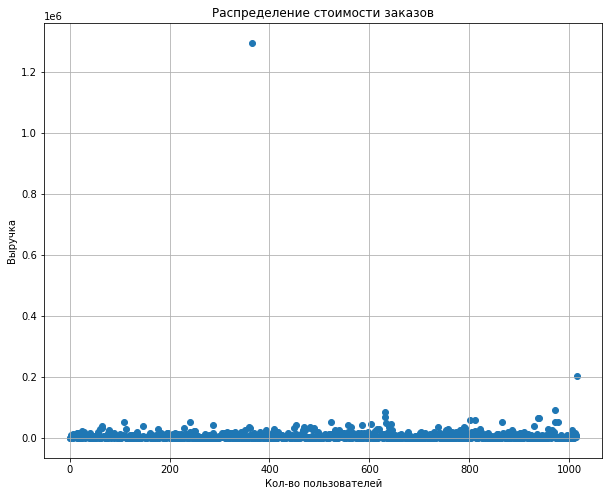

In [43]:
plt.figure(figsize=(10, 8))
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Кол-во пользователей')
plt.ylabel('Выручка')
plt.title('Распределение стоимости заказов')
plt.grid()
plt.show()

Большинство покупателей совершают покупки в пределах 20000.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [44]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Менее 5% покупают товары дорожен 26785 и менее 1% = 53904.

Граница для определения аномальных заказов - 26785.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [45]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [46]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [47]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

**Нулевая гипотеза (H0):** Нет различий между группами по среднему числу заказов.

**Альтернативная гипотеза (H1):** Есть различия между группами по среднему числу заказов.

Выведем относительный прирост среднего числа заказов группы B: 
среднее число заказов группы B / среднее число заказов группы A - 1.  

In [48]:
sampleA = pd.concat([ordersByUsersA['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
          name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
          name='orders')],axis=0)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("различие между А и B в процентах: {0:.1f}".format((sampleB.mean() / sampleA.mean() - 1)*100))

p-value: 0.011
различие между А и B в процентах: 16.0


Относительный проигрыш группы А равен 16 %. Так как p.value меньше уровня статистической значимости, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. Выборки статистически значимо отличаются.


11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза (H0):** Нет различий между группами по среднему чеку.

**Альтернативная гипотеза (H1):** Есть различия между группами по среднему чеку.

In [49]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
orders[orders['group']=='B']['revenue'])[1]))
print('различие между А и B в процентах:{0:.1f}'.format((orders[orders
['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100))

p-value: 0.829
различие между А и B в процентах:28.7


Различие между группами в пользу группы В в среднем чеке заказа 29%. 

Так как p.value больше уровня статистической значимости (0.05) нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, **не отвергаем**, а значит, различие между группами в среднем чеке не являтся статистически значимым.



12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

При обработке аномалий я определила верхнюю границу в выручке - 26785, в количестве заказов на посетителя - 2.

In [50]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
58


Всего 58 аномальных пользователя. Теперь нужно убрать их из данных и провести рассчеты ещё раз, уже по очищенным данным.

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:


In [52]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различие между А и B в процентах:{0:.1f}'.format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100))

p-value: 0.012
различие между А и B в процентах:18.2


Результаты по среднему количеству заказов: нулевую гипотезу о равенстве среднего количества заказов все равно отвергаем, p-value все ещё меньше уровня статистической значимости. 

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [53]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.646
-0.048


В отличие от "сырых" данных здесь наблюдает незначительный проигрыш группы В относительно группы А. Однако p-value все ещё выше уровня статистической значимости, хотя и незначительно уменьшился. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, всё ещё **не отвергаем** и незначительный проигрыш группы В не является статистически значимым.


**Какие можно сделать выводы:**

1) Существует статистически значимое различие по среднему количеству заказов между группами и по "сырым" данным, и по данным после фильтрации аномалий. Тут лучше себя показала группа В.

2) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

3) График относительного прироста кумулятивного среднего количества заказов на посетителя группы B относительно группы A показывает, что результат группы В лучше.

4) График изменения среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

Группа В лидирует в среднем количестве заказов, по среднему чеку нет статистически значимого различия. На основе полученных данных можно выдвинуть предположение закончить тест и зафиксировать победу группы В.

## Результат

**В ходе работы были выполнены следующие задачи:**

1) в первой части применены фреймворки ICE и RICE для приоритизации гипотез. Даны объяснения различий в приоритетах в обоих методах;

2) во второй части построены графии кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивного среднего количества заказов на посетителя по группам, относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A; также построены графики количества заказов по пользователям и стоимостей заказов;

3) посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным и по данным без выбросов;

4) посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным и без аномалий;

5) на основе полученных данных выдвинуто предложение закончить тест и зафиксировать победу группы В.